
# Activity 1: Digital Image Formation and Ehancement

Mary Franczine Tan <br>
Applied Physics 157 WFY-WFX-1 <br>
Submitted March 12, 2023

## Creating Synthetic Images

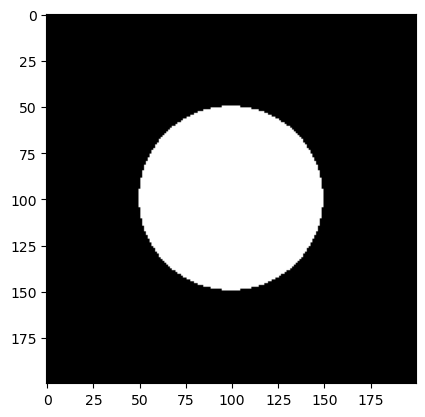

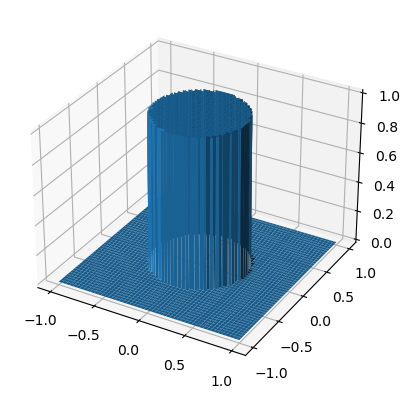

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 200 #the higher num is the finer 
x = np.linspace(-1,1,num = N)
y=x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R)) 
A[np.where(R<0.5)] = 1.0 # conditional change radius of circle

#display as an image
plt.imshow(A, cmap = "gray")

#display as a 3D surface in Cartesian coordinates
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X,Y,A)

## Activity 1.1 Image DIY

### 1.1.1 Sinusoid along the x-direction with frequency 4 cycles / cm

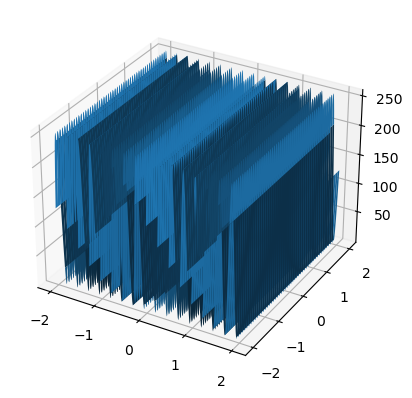

In [2]:
from math import pi

N = 400 # drawing size
x = np.linspace(-2, 2, num = N) # x values
y = x # y values
f = 4 # frequency

X,Y = np.meshgrid(x,y) # create mesh grid
R = np.sin(2 * pi * f * X) # find sin wave values
R_normalized = 255 * (R + 1) / 2 # normalize the values

A = np.zeros(np.shape(R_normalized))
A = R_normalized

#display as a 3D surface in Cartesian coordinates

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X,Y,A)

plt.show()

### 1.1.2 Grating with frequency of 5 line pairs / cm

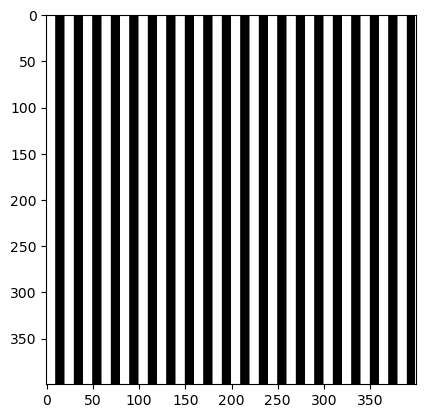

In [3]:
from scipy import signal

N = 400 # drawing size
x = np.linspace(-2, 2, num = N) # x values
y = x # y values
f = 5 # frequency

X,Y = np.meshgrid(x,y) # create mesh grid
R = signal.square(2 * pi * f * X) # find grating values

# show image
plt.imshow(R, cmap = "gray")

### 1.1.3 Hubble Space Telescope

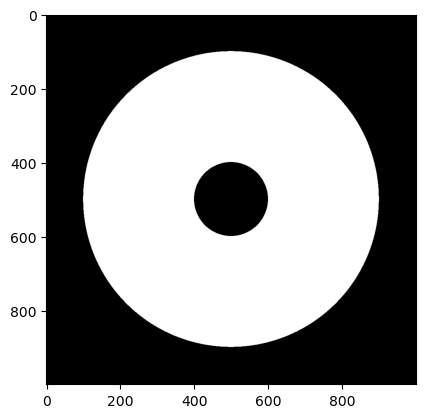

In [4]:
N = 1000 #the higher num is the finer 
x = np.linspace(-1,1,num = N) # declare x values
y = x # declare y values
X,Y = np.meshgrid(x,y) # create meshgrid

## main circle

R = np.sqrt(X**2 + Y**2) # find values of r
A = np.zeros(np.shape(R)) # create empty array
A[np.where(R<0.8)] = 1.0 # set citcle radius

## hole in circle

R_inner = np.sqrt(X**2 + Y**2)
A_inner = np.zeros(np.shape(R)) 
A_inner[np.where(R<0.2)] = 1.0

# subtract arrays to create hubble shape
A_hubble = A - A_inner

#display as an image
plt.imshow(A_hubble, cmap = "gray")

### 1.1.4 James Webb Space Telescope

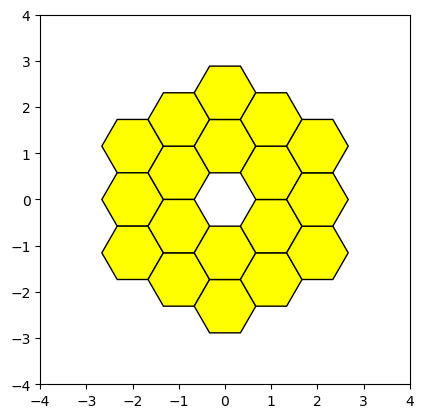

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np


coord = [[-2, 2, 0],[-2, 0, 0],[-2, 0, 2],[-1, -3, 0],[-1, 1, 0],[-1, 0, 1],[-1, 3, 0],[0, -2, 2],[0, -1, 1],
         [0, 1, -1],[0, 2, -2],[1, -3, 0],[1, -1, 0],[1, 0, -1],[1, 3, 0],[2, -2, 0],[2, 0, 0],[2, 2, 0]]


# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartesian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# Add some coloured hexagons
for x, y in zip(hcoord, vcoord):

    # matplotlib understands lower
    # case words for colours
    color = 'yellow'
    hex = RegularPolygon((x, y), numVertices = 6, radius = 2. / 3., orientation = np.radians(30),
                        facecolor = color, alpha = 1, edgecolor ='k')
    ax.add_patch(hex)

    
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

#### Sources:

Soriano, Maricor (2023). *Digital Image Formation and Enhancement*. 

@RajuKumar19 (2022, October 17). *Matplotlib.patches.RegularPolygon class in Python*. Retrieved from [here](https://www.geeksforgeeks.org/matplotlib-patches-regularpolygon-class-in-python/)

@Ishido (2017, October 2). *How to plot (x,y,z) coordinates in the shape of a hexagonal grid?*. Retrieved from [here](https://stackoverflow.com/questions/46525981/how-to-plot-x-y-z-coordinates-in-the-shape-of-a-hexagonal-grid)

## Image Modes

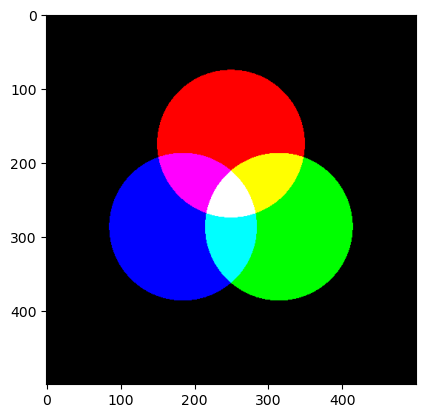

In [6]:
N = 500 # size of image
x = np.linspace(-10,10,num = N) # x values
y = x # y values
X,Y = np.meshgrid(x,y) # array
Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N)) # empty arrays for Red, Green, Blue

## draw colored circles

Rt, Rc, deg = 3, 4, 30 
    # Rt is distance of circles w/ e/o
    # Rc is radius of circle
    #deg is for distance of bottom circles

xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180)
R = np.sqrt((X)**2 + (Y+Rt)**2) 
Rd[np.where(R<Rc)]=1.0
R = np.sqrt((X-xt)**2 + (Y-yt)**2) 
Gn[np.where(R<Rc)]=1.0
R = np.sqrt((X+xt)**2 + (Y-yt)**2) 
Bl[np.where(R<Rc)]=1.0
I = np.zeros((N,N,3))

I[...,0] = Rd
I[...,1] = Gn
I[...,2] = Bl
fig = plt.figure()
plt.imshow(I)

## Activity 1.2 Color Image

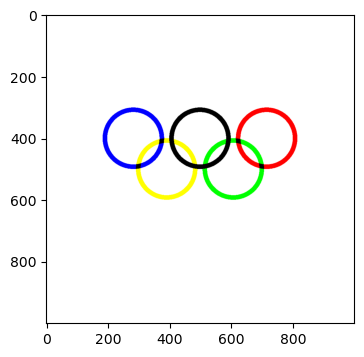

In [51]:
N = 1000 # set figure size
x = np.linspace(-10,10,num = N) # x-values
y = x # y-values
X,Y = np.meshgrid(x,y) # create meshgrid
Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N)) # arrays for pixels with Red, Green, Blue values

Rt, Rc, Ri, deg = 3, 2, 1.7, 30

def createColoredCircle(x, y, color):
    """
    creates circle given a color and its x and y position in the axis
    """
    
    loop = np.zeros((N,N)) # create new array 'loop'
    dx, dy = x*np.cos(deg*np.pi/180), y*np.sin(deg*np.pi/180) # sets the location of the loop in the plot

    R = np.sqrt((X+dx)**2 + (Y-dy)**2) # creates circle
    loop[np.where(R<Rc)] = 1
    
    R_inner = np.sqrt((X+dx)**2 + (Y-dy)**2) # creates inner circle
    
    loop[np.where(R_inner<Ri)] = 0 # removes the inside of the circle
    
    color[np.where(loop==1)] = 0 # transfers loop to the main image
    
    return

def circle(x, y, colors):
    """
    creates a circle given color components (red, green, or blue) it needs to get the final desired color
    """
    for c in colors:
        createColoredCircle(x,y,c)


I = np.zeros((N,N,3)) # creates array for logo

## set RGB channels to 1, makes the background white
Rd[np.where(Rd == 0)] = 1.0
Gn[np.where(Gn == 0)] = 1.0
Bl[np.where(Bl == 0)] = 1.0


## plot the loops that make up the logo
circle(-2.5, 0, [Rd, Bl]) # green
circle(-5,-4,[Gn, Bl]) # red
circle(0,-4,[Rd, Gn, Bl]) # black
circle(5,-4,[Rd, Gn]) # blue
circle(2.5,0,[Bl]) # yellow

## overlays the RGB channels to the image array
I[...,0] = Rd
I[...,1] = Gn
I[...,2] = Bl

## plot image
fig = plt.figure()
plt.imshow(I)

## Image Enhancement

## Activity 1.3 Altering the Input-Output Curve

The following images had their input-output curve altered in GIMP. What I've observed is that as I shifted the curve to the left, the image got brighter. Meanwhile, shifting it to the right would make it darker. 

All of the images below had their input-output curve shifted to the right to reveal more details.

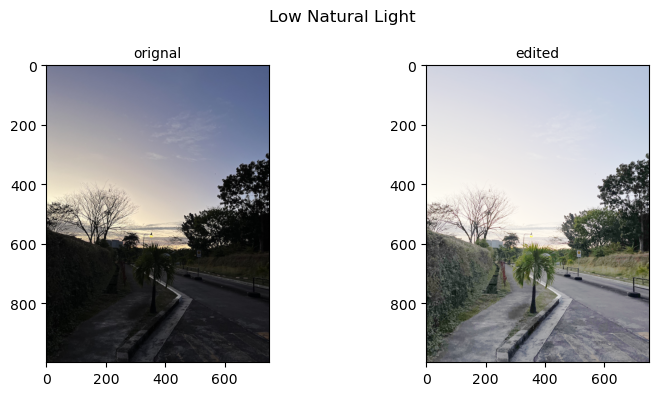

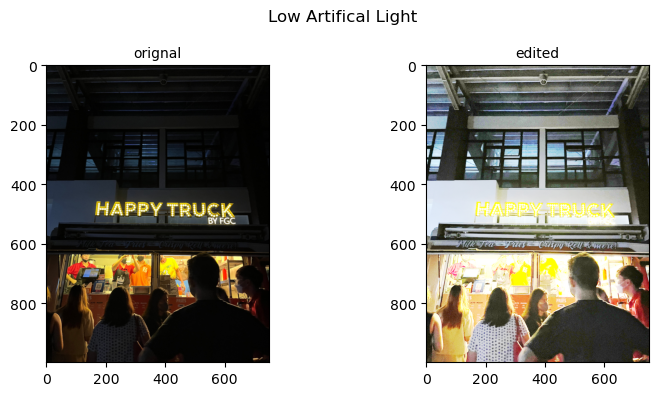

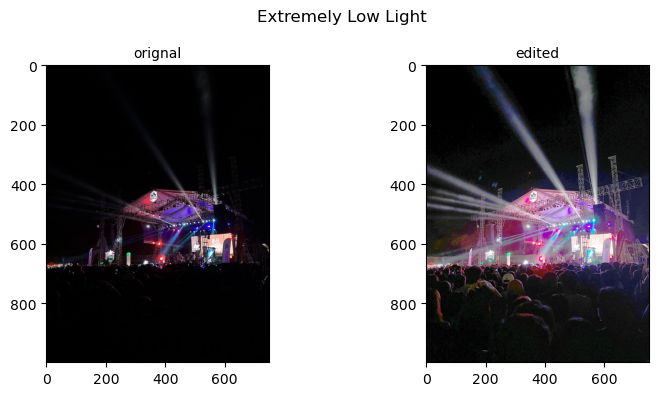

In [52]:
import matplotlib.image as mpimg

def showPhotos(orig, edited, title, cmap = None, vmin = None, vmax = None, t0 = 'orignal', t1 = 'edited'):
    """
    show two portrait-oriented photos side-by-side (mainly for comparison)
    """
    
    fig1, axes = plt.subplots(1,2, figsize=(8,4)) # create figure

    ## show first image
    axes[0].imshow(orig, cmap = cmap, vmin = vmin, vmax = vmax)
    axes[0].set_title(t0, size = 10)
    
    ## show second image
    axes[1].imshow(edited, cmap = cmap, vmin = vmin, vmax = vmax)
    axes[1].set_title(t1, size = 10)
    
    # set title and fixes figure layout
    fig1.suptitle(title, size = 12)
    fig1.tight_layout()
    
## load images

img1 =  mpimg.imread('IMG_3030.JPG')
img1e =  mpimg.imread('IMG_3030_IO.tif')

img2 =  mpimg.imread('IMG_1002.JPG')
img2e =  mpimg.imread('IMG_1002_IO.tif')

img3 =  mpimg.imread('IMG_2850.JPG')
img3e =  mpimg.imread('IMG_2850_IO.tif')

## show images
showPhotos(img1, img1e, 'Low Natural Light')
showPhotos(img2, img2e, 'Low Artifical Light')
showPhotos(img3, img3e, 'Extremely Low Light')


## 1.4 Histogram Backprojection on Grayscale Images

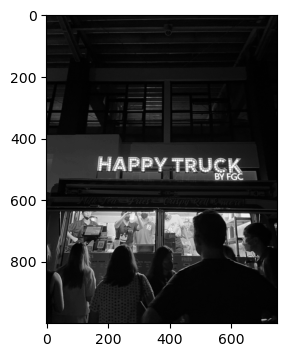

In [53]:
img = img2 # create image for backprojection

def rgb2gray(rgb):
    """
    converts rgb image to grayscale
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

grayIMG = rgb2gray(img) # convert img to grayscale

# show image
plt.imshow(grayIMG, cmap='gray') # show image

In [10]:
def plotPDFCDF(image, title, desiredCDF = None):
    """
    plots the 
    """
    
    hist, bins = np.histogram(image, bins=256, density=True) # create PDF
    CDF = hist.cumsum() # create CDF

    ## plot CDF and PDF
    
    if desiredCDF is None:
        y = 2
    else:
        y = 3
        
    fig1, axes = plt.subplots(1, y , figsize=(3 * y,2.5))

    axes[0].plot(hist)
    axes[0].set_title('PDF', size = 10)

    axes[1].plot(CDF)
    axes[1].set_title('CDF', size = 10)
    
    if desiredCDF is None:
        pass
    else:
        axes[2].plot(desiredCDF)
        axes[2].set_title('Desired CDF', size = 10)
    
    fig1.suptitle(title, size = 12)
    fig1.subplots_adjust(top=0.8)
    
    plt.show()
    
    return CDF

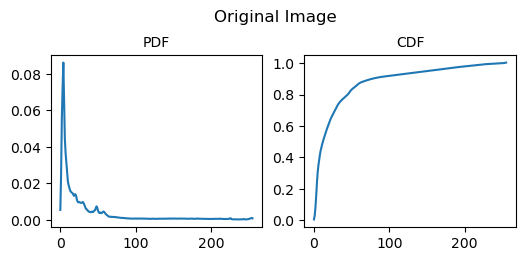

In [11]:
CDF = plotPDFCDF(grayIMG, 'Original Image')

In [12]:
x = np.linspace(0, 255, 256)

def interpT(r):
    return np.interp(r, x, CDF)

def interpback(T):
    return np.interp(T, g, x)

In [13]:
def changeCDF(newIMG):
    c = 0

    for i in range(len(grayIMG)):
        T = list(map(interpT, grayIMG[i,:]))
        newGS_unrounded = list(map(interpback, T))
        newGS = list(map(round, newGS_unrounded))
        newIMG[i, :] = newGS
        #print(c)
        c += 1
        
    return

In [14]:
def showBWPhotos(orig, edited, title):
    fig1, axes = plt.subplots(1,2, figsize=(8,4))

    axes[0].imshow(orig, cmap = 'gray')
    axes[0].set_title('original', size = 10)
    
    axes[1].imshow(edited, cmap = 'gray')
    axes[1].set_title('edited', size = 10)
    
    fig1.suptitle(title, size = 12)
    fig1.subplots_adjust(top=0.85)

#### Backprojection on Linear Function

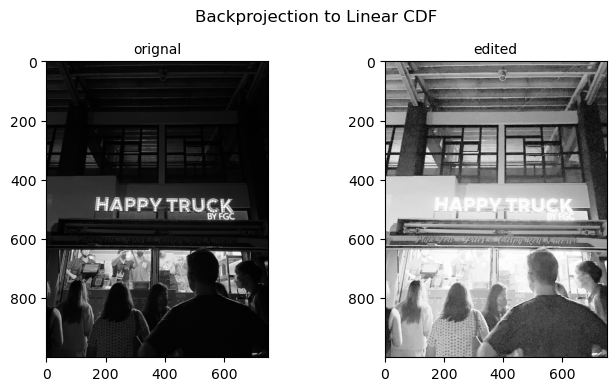

In [15]:
g = x / 255
linearIMG = np.zeros(np.shape(grayIMG))
changeCDF(linearIMG)
showPhotos(grayIMG, linearIMG, 'Backprojection to Linear CDF', cmap = 'gray')

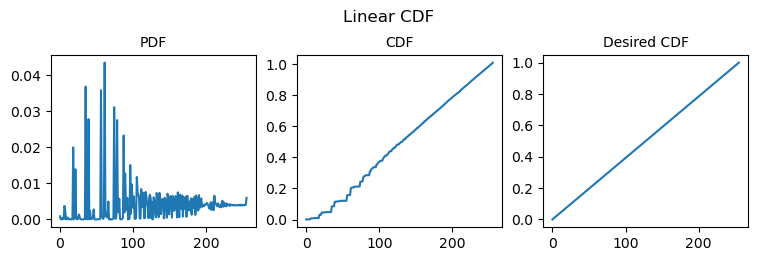

In [16]:
linearCDF = plotPDFCDF(linearIMG, 'Linear CDF', desiredCDF = g)

#### Backprojection on Sigmoid Function

In [17]:
x = np.linspace(0, 255, 256)
sigma = 15 # shift constant for modifying the sigmoid function

def sig(x):
    return 1/(1 + np.exp((-x / sigma) + (max(x) / (2 * sigma))))

g = sig(x)

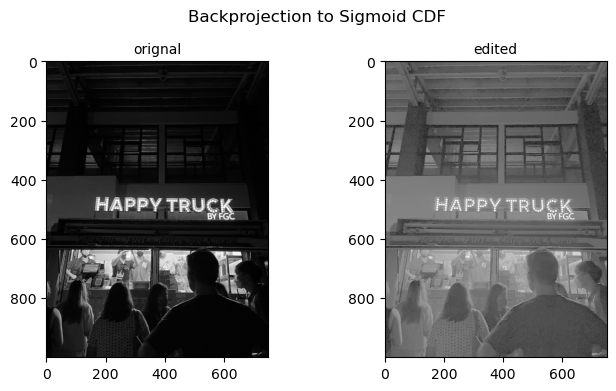

In [18]:
sigmoidIMG = np.zeros(np.shape(grayIMG))
changeCDF(sigmoidIMG)
showPhotos(grayIMG, sigmoidIMG, 'Backprojection to Sigmoid CDF', cmap = 'gray')

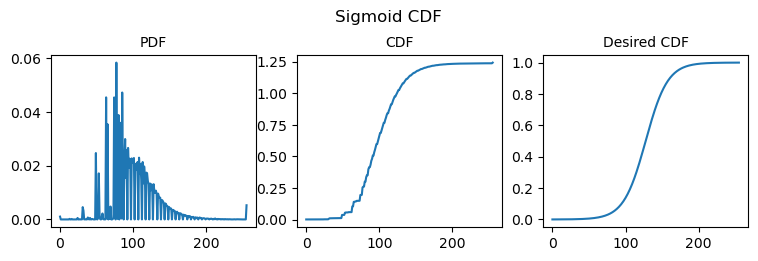

In [19]:
sigmoidCDF = plotPDFCDF(sigmoidIMG, 'Sigmoid CDF', desiredCDF = g)

#### sources:
Verma, Jayant (2022, August 4). *The Sigmoid Activation Function - Python Implementation*. Retrieved from [here](https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python)

@String (2015, March 31). *How to remodel sigmoid function so as to move stretch/enlarge it?*. Retrieved from [here](https://math.stackexchange.com/questions/1214167/how-to-remodel-sigmoid-function-so-as-to-move-stretch-enlarge-it)

@MattAllegro (2014, April 16). *How do you shift a sigmoidal curve to the right?*. Retrieved from [here](https://math.stackexchange.com/questions/755992/how-do-you-shift-a-sigmoidal-curve-to-the-right)

A big thank you to Sir Kenneth and Sir Rene for explaining the concept of backprojection since I didn't get it at first, as well as to my seatmate Zachary Hizon for letting me look at his code since my own attemps didn't work. 

## Contrast Stretching

### 1.5 Contrast Enhancement

In [20]:
def stretchContrast(image, imageCDF):
    
    roundCDF = list(np.round(imageCDF, 1))
    
    if (image.max() > 245) and (image.min() < 10):
        Imax = roundCDF.index(0.9)
        Imin = roundCDF.index(0.1)
    else:
        Imax = image.max()
        Imin = image.min()
    
    imageCS = 255 * ((image - Imin) / (Imax - Imin))
        
    return imageCS

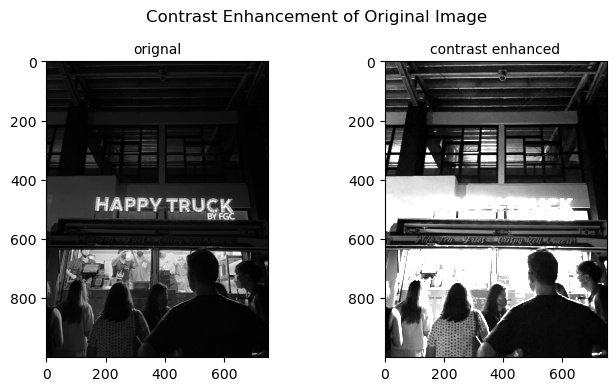

In [21]:
grayIMG_cs = stretchContrast(grayIMG, CDF)
showPhotos(grayIMG, grayIMG_cs, 'Contrast Enhancement of Original Image', 
           cmap='gray', vmin = 0, vmax = 255, t1 = 'contrast enhanced')

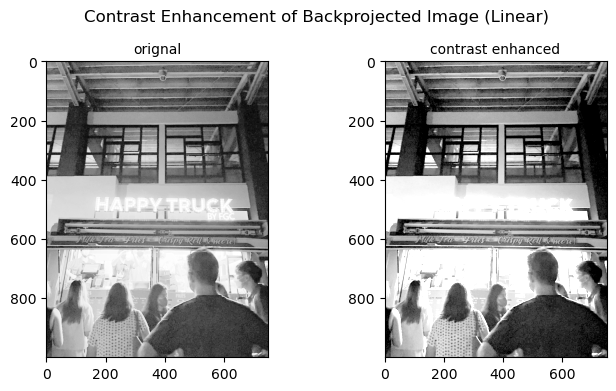

In [22]:
linearIMG_cs = stretchContrast(linearIMG, linearCDF)
showPhotos(linearIMG, linearIMG_cs, 'Contrast Enhancement of Backprojected Image (Linear)', 
           cmap='gray', vmin = 0, vmax = 255, t1 = 'contrast enhanced')

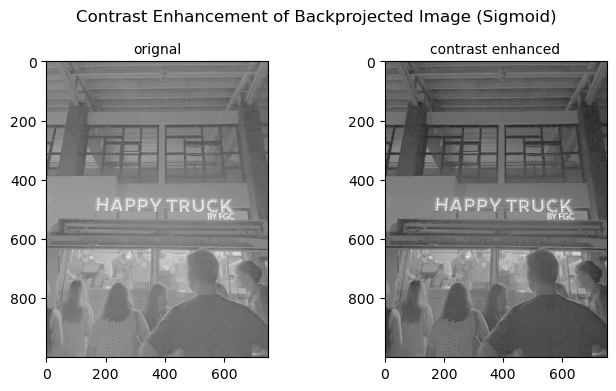

In [23]:
sigmoidIMG_cs = stretchContrast(sigmoidIMG, sigmoidCDF)
showPhotos(sigmoidIMG, sigmoidIMG_cs, 'Contrast Enhancement of Backprojected Image (Sigmoid)', 
           cmap='gray', vmin = 0, vmax = 255, t1 = 'contrast enhanced')

## White Balancing of Color Images

### Activity 1.6 Restoring Faded Color Photographs

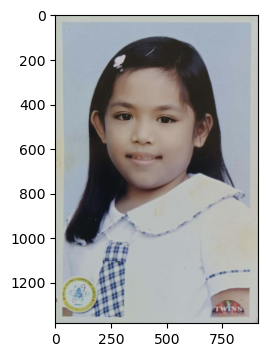

In [24]:
img4 = mpimg.imread('IMG_3158.JPG')

plt.imshow(img4)

#### Contrast Stretching

In [25]:
R = img4[..., 0]
G = img4[..., 1]
B = img4[..., 2]

In [26]:
def plot4IMG(img1, img2, img3, img4, title, t1, t2, t3, t4, c1 = None, c2 = None, c3 = None, c4 = None):

    fig1, axes = plt.subplots(1,4, figsize=(13,4))

    axes[0].imshow(img1, cmap = c1)
    axes[0].set_title(t1, size = 10)

    axes[1].imshow(img2, cmap = c2)
    axes[1].set_title(t2, size = 10)

    axes[2].imshow(img3, cmap = c3)
    axes[2].set_title(t3, size = 10)

    axes[3].imshow(img4, cmap = c4)
    axes[3].set_title(t4, size = 10)

    fig1.suptitle(title, size = 12)
    fig1.subplots_adjust(top=0.85)

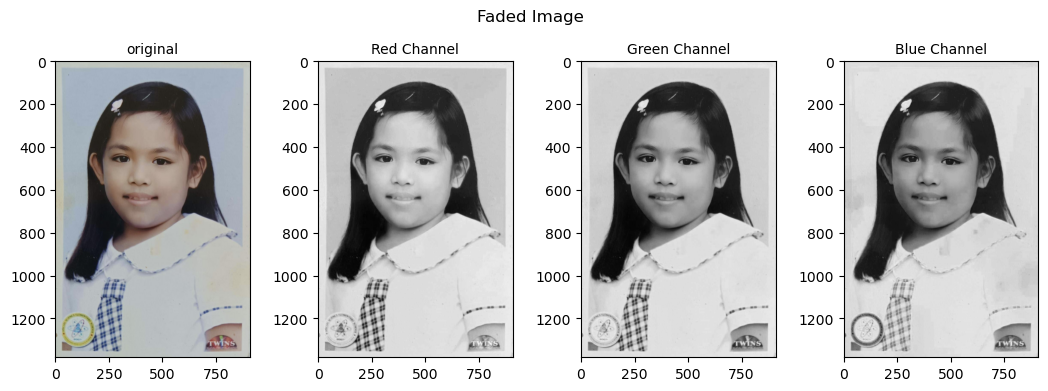

In [27]:
plot4IMG(img4, R, G, B, 'Faded Image', 'original', 'Red Channel', 'Green Channel', 
         'Blue Channel', c2 = 'gray', c3 = 'gray', c4 = 'gray')

In [28]:
def stretchContrast(image):

    imageCS = (image - image.min()) / (image.max() - image.min())
        
    return imageCS

Rstretched = stretchContrast(R)
Gstretched = stretchContrast(G)
Bstretched = stretchContrast(B)

In [29]:
img4_CSrestored = np.zeros(np.shape(img4))

img4_CSrestored[..., 0] = Rstretched
img4_CSrestored[..., 1] = Gstretched
img4_CSrestored[..., 2] = Bstretched

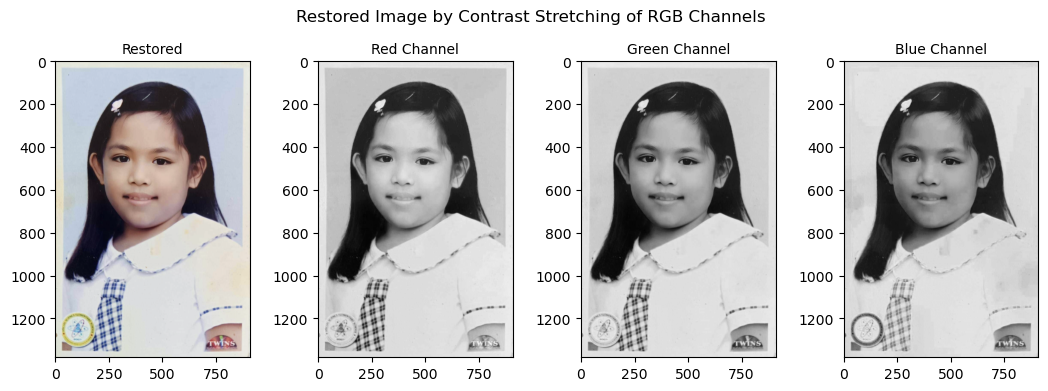

In [30]:
plot4IMG(img4_CSrestored, Rstretched, Gstretched, Bstretched, 'Restored Image by Contrast Stretching of RGB Channels', 
         'Restored', 'Red Channel', 'Green Channel', 'Blue Channel', c2 = 'gray', c3 = 'gray', c4 = 'gray')

### Gray World Algorithm

In [31]:
Rave = R.mean()
Gave = G.mean()
Bave = B.mean()

In [32]:
Rwb = R / Rave
Gwb = G / Gave
Bwb = B / Gave

In [33]:
img4_GWArestored = np.zeros(np.shape(img4))

img4_GWArestored[..., 0] = Rwb
img4_GWArestored[..., 1] = Gwb
img4_GWArestored[..., 2] = Bwb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


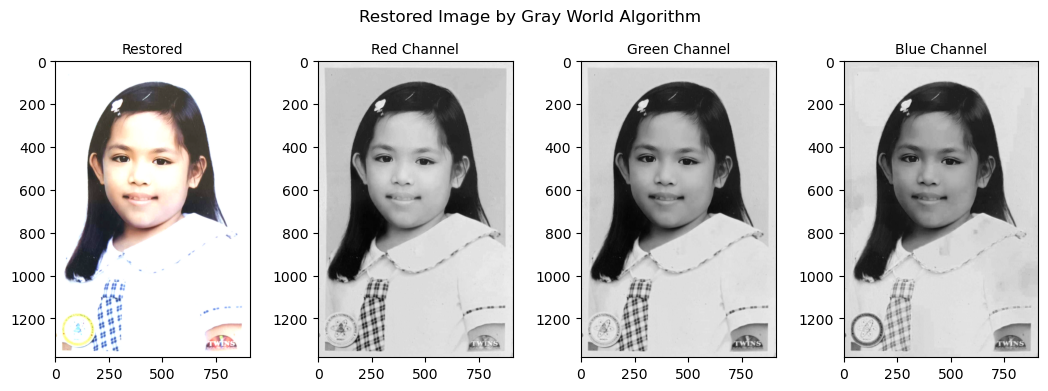

In [34]:
plot4IMG(img4_GWArestored, Rwb, Gwb, Bwb, 'Restored Image by Gray World Algorithm', 'Restored', 
         'Red Channel', 'Green Channel', 'Blue Channel', c2 = 'gray', c3 = 'gray', c4 = 'gray')

### White Patch Alogrithm

The border around the photo was originally white. To simplify the selection of the white patch, the top border will be used as the white patch for the algorithm.

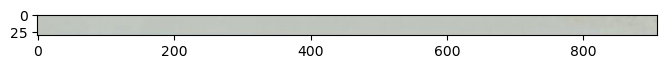

In [35]:
white = img4[0:30, :]
plt.imshow(white)

In [36]:
whiteR = white[..., 0]
whiteG = white[..., 1]
whiteB = white[..., 2]

In [37]:
Rw = whiteR.mean()
Gw = whiteG.mean()
Bw = whiteB.mean()

In [38]:
Rwb = R / Rw
Gwb = G / Gw
Bwb = B / Bw

In [39]:
img4_WPArestored = np.zeros(np.shape(img4))

img4_WPArestored[..., 0] = Rwb
img4_WPArestored[..., 1] = Gwb
img4_WPArestored[..., 2] = Bwb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


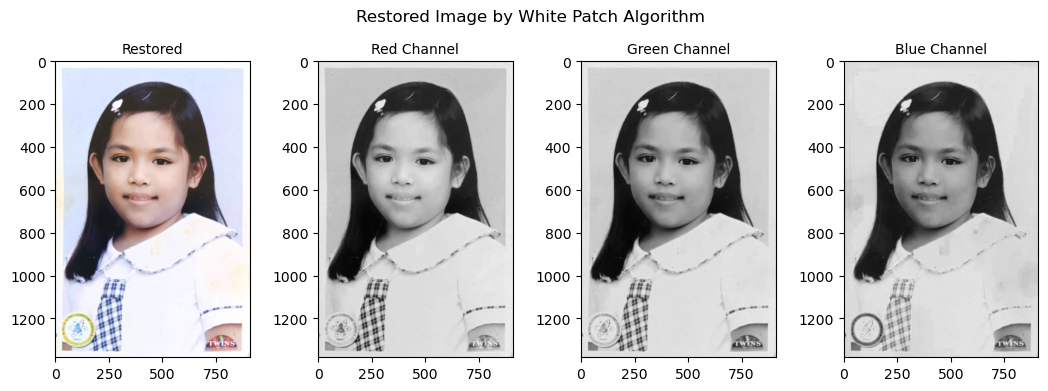

In [40]:
plot4IMG(img4_WPArestored, Rwb, Gwb, Bwb, 'Restored Image by White Patch Algorithm', 'Restored', 
         'Red Channel', 'Green Channel', 'Blue Channel', c2 = 'gray', c3 = 'gray', c4 = 'gray')

### The results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


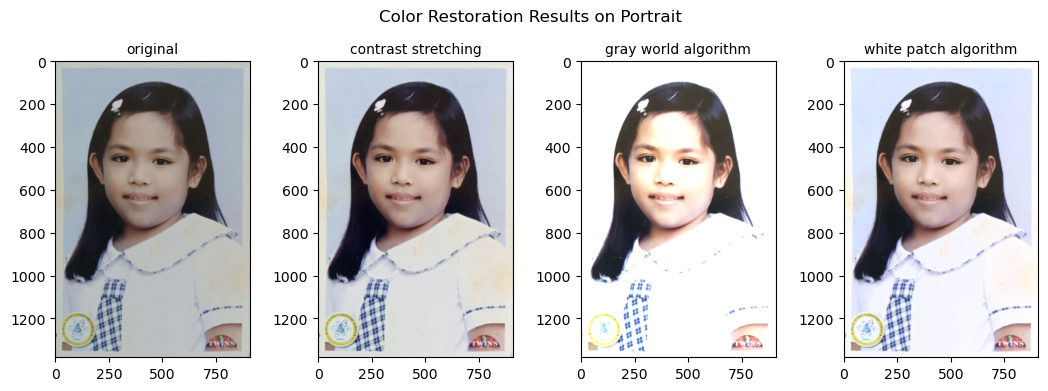

In [41]:
plot4IMG(img4,img4_CSrestored, img4_GWArestored, img4_WPArestored, 'Color Restoration Results on Portrait', 'original', 
         'contrast stretching', 'gray world algorithm', 'white patch algorithm')

#### functions for white balancing

In [42]:
def wbConStretch(image):
    
    R = image[..., 0]
    G = image[..., 1]
    B = image[..., 2]
    
    Rstretched = stretchContrast(R)
    Gstretched = stretchContrast(G)
    Bstretched = stretchContrast(B)
    
    image_CSrestored = np.zeros(np.shape(image))

    image_CSrestored[..., 0] = Rstretched
    image_CSrestored[..., 1] = Gstretched
    image_CSrestored[..., 2] = Bstretched
    
    return image_CSrestored

In [43]:
def wbGrayWorld(image):
    
    R = image[..., 0]
    G = image[..., 1]
    B = image[..., 2]
    
    Rave = R.mean()
    Gave = G.mean()
    Bave = B.mean()
    
    Rwb = R / Rave
    Gwb = G / Gave
    Bwb = B / Gave
    
    image_GWArestored = np.zeros(np.shape(image))

    image_GWArestored[..., 0] = Rwb
    image_GWArestored[..., 1] = Gwb
    image_GWArestored[..., 2] = Bwb
    
    return image_GWArestored

In [44]:
def wbWhitePatch(image, patch):
    
    R = image[..., 0]
    G = image[..., 1]
    B = image[..., 2]
    
    whiteR = white[..., 0]
    whiteG = white[..., 1]
    whiteB = white[..., 2]

    Rw = whiteR.mean()
    Gw = whiteG.mean()
    Bw = whiteB.mean()

    Rwb = R / Rw
    Gwb = G / Gw
    Bwb = B / Bw

    image_WPArestored = np.zeros(np.shape(image))

    image_WPArestored[..., 0] = Rwb
    image_WPArestored[..., 1] = Gwb
    image_WPArestored[..., 2] = Bwb
    
    return image_WPArestored

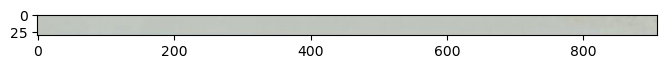

In [45]:
img5 = mpimg.imread('IMG_3159.JPG') # load image

## select white patch

white5 = img5[310:415, 715:795]
plt.imshow(white)

In [46]:
img5_CSrestored = wbConStretch(img5)
img5_GWArestored = wbGrayWorld(img5)
img5_WPArestored = wbWhitePatch(img5, white5)

In [47]:
def plot2x2(img1, img2, img3, img4, title, t1 = 'original', t2 = 'contrast stretching',t3 = 'gray world algorithm', 
            t4 = 'white patch algorithm', c1 = None, c2 = None, c3 = None, c4 = None):

    fig1, axes = plt.subplots(2,2, figsize=(8,6))

    axes[0][0].imshow(img1, cmap = c1)
    axes[0][0].set_title(t1, size = 10)

    axes[0][1].imshow(img2, cmap = c2)
    axes[0][1].set_title(t2, size = 10)

    axes[1][0].imshow(img3, cmap = c3)
    axes[1][0].set_title(t3, size = 10)

    axes[1][1].imshow(img4, cmap = c4)
    axes[1][1].set_title(t4, size = 10)

    fig1.suptitle(title, size = 12)
    fig1.tight_layout()
    
    return

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


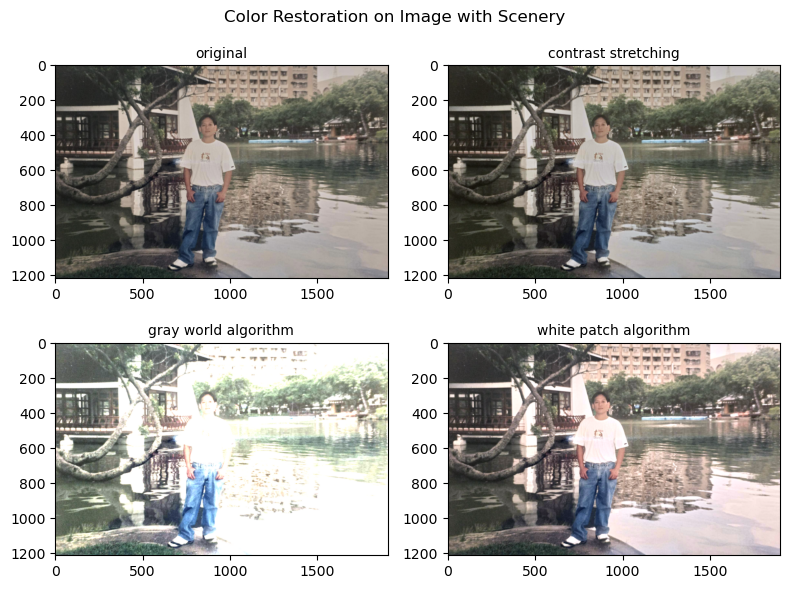

In [48]:
plot2x2(img5, img5_CSrestored, img5_GWArestored, img5_WPArestored, title = 'Color Restoration on Image with Scenery')

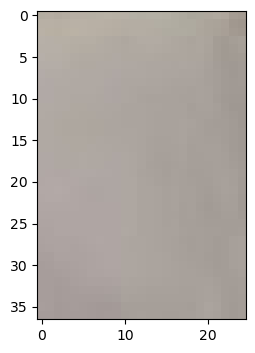

In [49]:
img6 = mpimg.imread('IMG_3163.JPG') # load image

## select white patch

white6 = img6[893:930, 710:735]
plt.imshow(white6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


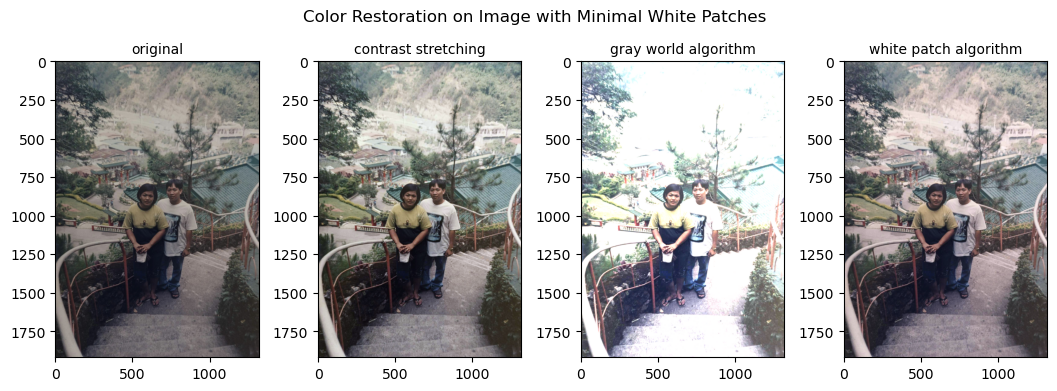

In [50]:
img6_CSrestored = wbConStretch(img6)
img6_GWArestored = wbGrayWorld(img6)
img6_WPArestored = wbWhitePatch(img6, white6)

plot4IMG(img6, img6_CSrestored, img6_GWArestored, img6_WPArestored, 
         title = 'Color Restoration on Image with Minimal White Patches', t1 = 'original', 
         t2 = 'contrast stretching',t3 = 'gray world algorithm', t4 = 'white patch algorithm')